# Representação em Processamento Digital de Imagens

Representação envolve o desenvolvimento de um sistema para análise de imagens é a seleção de um conjunto de características extraídas do objeto de interessepara o propósito de classificação. Foi utilizado Numpy e OpenCV.

## Descrição

Uma vez que um conjunto de pixels tenha sido selecionado a partir da segmentação, é necessário representá-los e descrevê-los de forma adequada para posterior processamento.

A representação de uma região pode ser feita de duas formas:

- Pelo seu contorno.
- Pelos pixels que representam o interior.

A descrição consiste gerar características com base no esquema de
representação escolhido.

Exemplos de aplicações são:

- Reconhecimento de padrões (por exemplo, OCR ou identificação de formas)
- Análise de textura em imagens médicas ou satélites.
- Redução de dados e extração de características para aprendizado de máquina.

- **Borda (Fronteira)**

    A borda representa a transição entre diferentes regiões em uma imagem, geralmente caracterizada por mudanças abruptas na intensidade. A detecção de bordas (como com Sobel ou Canny) é usada para delimitar objetos e regiões.

- **Seguidor de Fronteira**

    O seguidor de fronteira é um algoritmo usado para percorrer os pixels de uma borda de forma contínua, conectando pixels adjacentes que pertencem à mesma borda. É útil para traçar o contorno de objetos em imagens segmentadas.

- **Código da Cadeia**

    Uma técnica de compactação de bordas que representa o contorno de um objeto como uma sequência de direções (norte, leste, sul, oeste, etc.) entre pixels conectados. É eficiente para armazenar informações de contorno.

- **Aproximações Poligonais**

    Reduz o número de pontos em uma borda, aproximando-a por segmentos de linha (polígonos). É usado para simplificar a representação de formas complexas, mantendo as características principais.

- **Esqueleto**

    O esqueleto é uma representação reduzida de uma forma, que preserva sua estrutura básica. Ele é obtido reduzindo iterativamente a largura de um objeto até restar uma linha central. É útil para análise de formas e topologia.

- **Assinatura**

    Uma assinatura é uma representação de forma que descreve a distância do contorno de um objeto a partir de um ponto de referência (geralmente o centroide). Ela é útil para comparar formas.

- **Descritores de Fourier**

    Os descritores de Fourier analisam a frequência espacial do contorno de um objeto. Eles transformam a borda em uma representação no domínio da frequência, útil para comparar formas independente de rotação ou escala.

- **Textura**

    A textura descreve padrões locais em uma imagem, como rugosidade ou repetição. Características como contraste, homogeneidade e direção são extraídas para análise.

- **Momentos Estatísticos**

    Os momentos estatísticos descrevem a distribuição de intensidades de pixel em uma região. Exemplos incluem média, variância, assimetria e curtose, usados para caracterizar texturas ou regiões.

- **Matrizes de Co-ocorrência**

    Uma matriz de co-ocorrência mede a frequência com que pares de valores de intensidade de pixel ocorrem em uma imagem, em uma determinada direção e distância. Características como contraste, energia e homogeneidade são derivadas dela.

- **Momentos Invariantes**

    Os momentos invariantes são características calculadas a partir de momentos geométricos, projetados para serem invariantes a transformações como translação, rotação e escala. Eles são úteis para reconhecimento de objetos.


## Código

O segmento escolhido para implementação foi **Aproximações Poligonais**.

- **Aproximações por Polígonos de Perímetro Mínimo (MPP - Minimum Perimeter Polygon)**

    Tem o objetivo de aproximar os contornos da imagem com polígonos de menor perímetro. É uma forma de simplificar os contornos, mantendo as formas principais da imagem.

    Para dada imagem de um papel amassado o processo foi o seguinte:

    De começo foi aplicado um threshold do tipo adaptiveGaussian para segmentar a imagem
    
    **->** Depois foi utilizado a operação de abertura de morfologia para consolidar as bordas do papel

    **->** Para melhor vizualização foi aplicado uma inversão da imagem

    **->** E então foi aplicado a aproximação de Contornos (MPP) para gerar as linhas que aproximam o contorno do papel

    A variação do parametro de detalhes da funçao de MPP consegue alterar o quão fiel será a aproximação ao contorno original. Quanto menor o valor mais simplificado será a aproximação.

    ```python
    def MPP(imagem, detalhes=100):
        detalhes = 1/detalhes
        copia = imagem.copy()
        new = copia.copy()*0.5
        new = cv2.cvtColor(new.astype(np.uint8), cv2.COLOR_GRAY2BGR)
        contours, _ = cv2.findContours(copia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            epsilon = detalhes * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            cv2.drawContours(new, [approx], -1, (255, 0, 0), 3)
        return new
    ````

### Código final

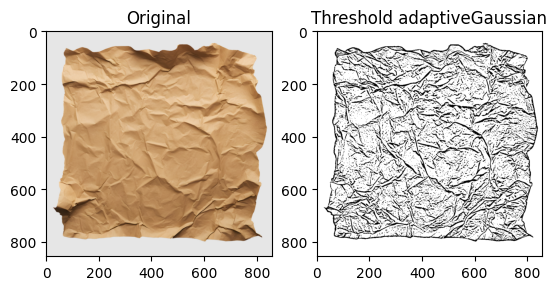

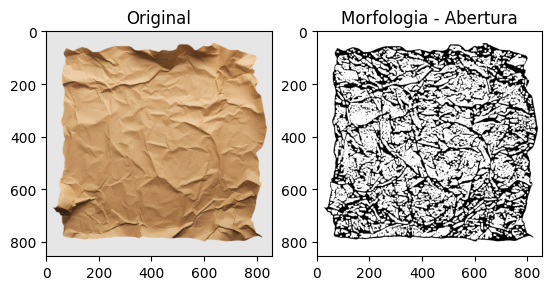

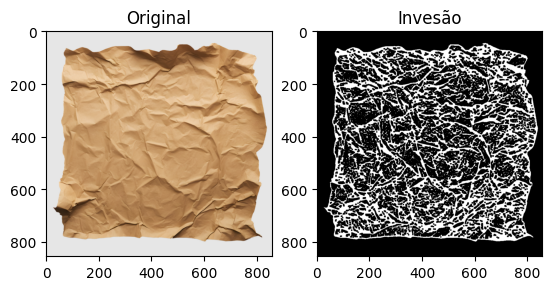

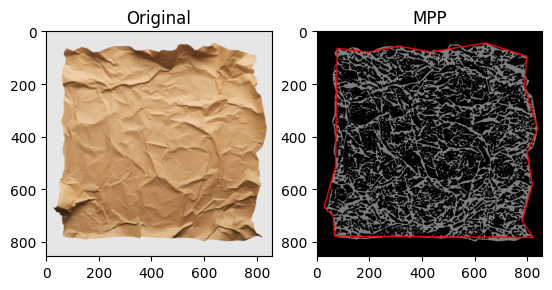

In [1]:
import datetime
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
import math

def plot(img, edit, txt1, txt2):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(txt1)
    ax[1].imshow(edit, cmap='gray')
    ax[1].set_title(txt2)
    plt.show()

def salvar(imagem, nome):
    print("Desenha salvar a imagem? (s/N)")
    entrada = input()
    if entrada == "s":
        time = datetime.datetime.now().strftime("%Y-%m-%d")
        imagem.save(f'imgs/{nome}{time}.png')

def threshold(imagem, tipo):
    imagem = imagem.convert('L')
    imagem = np.array(imagem)
    copia = imagem.copy()

    match tipo:
        case 'global':
            limiar = 127
            for i in range(copia.shape[0]):
                for j in range(copia.shape[1]):
                    if copia[i][j] >= limiar:
                        copia[i][j] = 255
                    else:
                        copia[i][j] = 0
        case 'otsu':
            limiar = cv2.threshold(copia, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
            copia = limiar
        case 'adaptiveMean':
            copia = cv2.adaptiveThreshold(copia, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        case 'adaptiveGaussian':
            copia = cv2.adaptiveThreshold(copia, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        case 'blur':
            copia = cv2.GaussianBlur(copia, (5, 5), 0)
            copia = cv2.threshold(copia, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    return copia

def inverter(imagem):
    copia = imagem.copy()
    return 255 - copia

def MPP(imagem, detalhes=100):
    detalhes = 1/detalhes
    copia = imagem.copy()
    new = copia.copy()*0.5
    new = cv2.cvtColor(new.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    contours, _ = cv2.findContours(copia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        epsilon = detalhes * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        cv2.drawContours(new, [approx], -1, (255, 0, 0), 3)
    return new

def main():
    amassado = Image.open('imgs/amassado.png')

    debug = True

    setup = threshold(amassado, 'adaptiveGaussian')
    if debug: 
        plot(amassado, setup, 'Original', 'Threshold adaptiveGaussian')

    setup = cv2.morphologyEx(setup, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))

    if debug: 
        plot(amassado, setup, 'Original', 'Morfologia - Abertura')

    setup = inverter(setup)

    if debug: 
        plot(amassado, setup, 'Original', 'Invesão')
    
    plot(amassado, MPP(setup, 200), "Original", "MPP")

if __name__ == "__main__":
    main()
